<a href="https://colab.research.google.com/github/aayushkubb/nlp/blob/main/Text_Preprocessing_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=11WfnSPn79Opv2rwTxldDYcv4Dv0pV-f3' />

# Basic Text Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
sentence = '''
Hello I am Aayush living in Canada
but mentally I am wandering in the streets of India
eating american food
living indian life
drinking candian water'''
tokens = word_tokenize(sentence)
print(tokens)

['Hello', 'I', 'am', 'Aayush', 'living', 'in', 'Canada', 'but', 'mentally', 'I', 'am', 'wandering', 'in', 'the', 'streets', 'of', 'India', 'eating', 'american', 'food', 'living', 'indian', 'life', 'drinking', 'candian', 'water']


In [ ]:
lowercase_word = []
for word in tokens:
    word = word.lower()
#     print(word)
    lowercase_word.append(word)

In [ ]:
lowercase_word

['hello',
 'i',
 'am',
 'aayush',
 'living',
 'in',
 'canada',
 'but',
 'mentally',
 'i',
 'am',
 'wandering',
 'in',
 'the',
 'streets',
 'of',
 'india',
 'eating',
 'american',
 'food',
 'living',
 'indian',
 'life',
 'drinking',
 'candian',
 'water']

In [ ]:
#PorterStemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
for word in lowercase_word:
    tokens = ps.stem(word)
    print(word, ":",tokens)

hello : hello
i : i
am : am
aayush : aayush
living : live
in : in
canada : canada
but : but
mentally : mental
i : i
am : am
wandering : wander
in : in
the : the
streets : street
of : of
india : india
eating : eat
american : american
food : food
living : live
indian : indian
life : life
drinking : drink
candian : candian
water : water


In [ ]:
import nltk
nltk.download('wordnet')#Need to have this for Stemming

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Lemmatizer
from nltk.stem import WordNetLemmatizer
wml = WordNetLemmatizer()
lemma = []
for word in lowercase_word:
    tokens = wml.lemmatize(word)
    lemma.append(tokens)
    print(word,":",tokens)

hello : hello
i : i
am : am
aayush : aayush
living : living
in : in
canada : canada
but : but
mentally : mentally
i : i
am : am
wandering : wandering
in : in
the : the
streets : street
of : of
india : india
eating : eating
american : american
food : food
living : living
indian : indian
life : life
drinking : drinking
candian : candian
water : water


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
filter_words = []
Stopwords = set(stopwords.words('english'))
for word in lemma:
    if word not in Stopwords:
        filter_words.append(word)

In [ ]:
len(lemma)

26

In [ ]:
len(filter_words)

17

In [ ]:
filter_words

['hello',
 'aayush',
 'living',
 'canada',
 'mentally',
 'wandering',
 'street',
 'india',
 'eating',
 'american',
 'food',
 'living',
 'indian',
 'life',
 'drinking',
 'candian',
 'water']

# Converting Text to Features Using One Hot Encoding
--
The traditional method used for feature engineering is One Hot encoding.
If anyone knows the basics of machine learning, One Hot encoding is
something they should have come across for sure at some point of time or
maybe most of the time. It is a process of converting categorical variables
into features or columns and coding one or zero for the presence of that
particular category. We are going to use the same logic here, and the
number of features is going to be the number of total tokens present in the
whole corpus.

<small><b><font color='brown'>On hot encoding was covered under "Machine Learning Course" also.</font></b></small>

Problem
--
You want to convert text to feature using One Hot encoding.

Solution
--
One Hot Encoding will basically convert characters or words into binary
numbers as shown below.

In [ ]:
Text = "I am learning NLP , NLP is fun"

# Importing the library
import pandas as pd

# Generating the features
pd.get_dummies(Text.split())

,",",I,NLP,am,fun,is,learning
0,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False
5,False,False,True,False,False,False,False
6,False,False,False,False,False,True,False
7,False,False,False,False,True,False,False


Output has 7 features since the number of distinct words present in the input was 7.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

corpus = [
    # Positive Reviews
    'This is an excellent movie',
    'The move was fantastic I like it',
    'You should watch it is brilliant',
    'Exceptionally good',
    'Wonderfully directed and executed I like it',
    'Its a fantastic series',
    'Never watched such a brillent movie',
    'It is a Wonderful movie',

    # Negtive Reviews
    "horrible acting",
    'waste of money',
    'pathetic picture',
    'It was very boring',
    'I did not like the movie',
    'The movie was horrible',
    'I will not recommend',
    'The acting is pathetic'
]

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# 1. Combine all words from the corpus into a single list
all_words = []
for sentence in corpus:
    all_words.extend(sentence.split())

# 2. Create a 2D array from the combined word list
all_words_2d = [[word] for word in all_words]

# 3. Fit the encoder to the combined word list
enc.fit(all_words_2d)

# 4. Transform each sentence in the corpus into a one-hot encoded representation
encoded_corpus = []
for sentence in corpus:
    # Reshape the sentence into a 2D array
    sentence_2d = [[word] for word in sentence.split()]
    # Transform the sentence using the fitted encoder
    encoded_sentence = enc.transform(sentence_2d)
    # Flatten the encoded sentence using sum along axis 1
    flat_encoded_sentence = encoded_sentence.sum(axis=0)

    # Append the encoded sentence to the encoded corpus
    encoded_corpus.append(flat_encoded_sentence)

# Print the encoded corpus (first few sentences for brevity)
for i in range(3):
    print(f"Sentence {i + 1}: {corpus[i]}")
    print(f"Encoded:\n{encoded_corpus[i]}\n")

Converting Text to Features Using Count Vectorizing
--
Above approach "One hot encoding" has a disadvantage. It does not take the
frequency of the word occurring into consideration. If a particular word
is appearing multiple times, there is a chance of missing the information
if it is not included in the analysis. A count vectorizer will solve that
problem.

Problem
--
How do we convert text to feature using a count vectorizer?


In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer

# Text
text = ["I love NLP and I will learn NLP in 2month "]

# create the transform


# tokenizing


# encode document


# summarize & generating output




Solution
--
Count vectorizer is almost similar to One Hot encoding. The only
difference is instead of checking whether the particular word is present or
not, it will count the words that are present in the document.
Observe the below example. The words “I” and “NLP” occur twice in
the first document.

In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


The arrangement is done alphabatecially. and then the dict index is used to vectorize all the output.

In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The quick brown fox jumped over a lazy dog."]

# create the transform
vectorizer2 = CountVectorizer()

# tokenize and build vocab
vectorizer2.fit(text)

# summarize
print(vectorizer2.vocabulary_)

# encode document
vector = vectorizer2.transform(text)

# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 1]]



**Note** : CountVectorizer does not consider single char words like `I` , `a`.

Generating N-grams
--
If you observe the above methods, each word is considered as a feature.
There is a drawback to this method. It does not consider the previous and the next words, to see if that would give a proper and complete meaning to the words.

For example: consider the word “not bad.” If this is split into individual
words, then it will lose out on conveying “good” – which is what this word
actually means.

As we saw, we might lose potential information or insight because a lot of words make sense once they are put together. This problem can be solved by N-grams.

N-grams are the fusion of multiple letters or multiple words. They are
formed in such a way that even the previous and next words are captured.

• Unigrams are the unique words present in the sentence.
• Bigram is the combination of 2 words.
• Trigram is 3 words and so on.

For example,
“I am learning NLP”

Unigrams: “I”, “am”, “ learning”, “NLP”

Bigrams: “I am”, “am learning”, “learning NLP”

Trigrams: “I am learning”, “am learning NLP”

Problem
--
Generate the N-grams for the given sentence.

Solution
--
There are a lot of packages that will generate the N-grams. The one that is
mostly used is TextBlob.

In [ ]:
!pip install textblob

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

Text = "I am learning NLP"

# Use the below TextBlob function to create N-grams. Use the text that is
# defined above and mention the “n” based on the requirement.

#Import textblob
from textblob import TextBlob

#For unigram : Use n = 1
TextBlob(Text).ngrams(1)

[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [ ]:
#For Bigram : use n = 2
TextBlob(Text).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [ ]:
#For trigram : use n = 3
TextBlob(Text).ngrams(3)

[WordList(['I', 'am', 'learning']), WordList(['am', 'learning', 'NLP'])]

## Another way


In [ ]:
import nltk

word_data = "The best performance can bring in sky high success."
nltk_tokens = nltk.word_tokenize(word_data)

print(list(nltk.bigrams(nltk_tokens)))
print(list(nltk.trigrams(nltk_tokens)))

[('The', 'best'), ('best', 'performance'), ('performance', 'can'), ('can', 'bring'), ('bring', 'in'), ('in', 'sky'), ('sky', 'high'), ('high', 'success'), ('success', '.')]
[('The', 'best', 'performance'), ('best', 'performance', 'can'), ('performance', 'can', 'bring'), ('can', 'bring', 'in'), ('bring', 'in', 'sky'), ('in', 'sky', 'high'), ('sky', 'high', 'success'), ('high', 'success', '.')]


# NGRAMS vs Colocations

In [ ]:
sentences=["good experience at Rancho Valencia was absolutely perfect from beginning to end",
           "good experience. Amazing place. Everyone was extremely warm and welcoming",
           "We booked a three night stay at Rancho Valencia to play some tennis",
           "bad experience but amazing place. I stayed here with my family for my daughters wedding at hotel",
           "I travel a lot with my job, so I'm constantly staying at hotel"]

In [ ]:
tokens=[]
for i in sentences:
  tokens.extend(nltk.word_tokenize(i))

In [ ]:
import nltk
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

In [ ]:
#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)#trigrams
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [ ]:
bigramFreqTable

,bigram,freq
0,"(good, experience)",2
42,"(with, my)",2
15,"(place, .)",2
49,"(at, hotel)",2
3,"(Rancho, Valencia)",2
...,...,...
27,"(night, stay)",1
28,"(stay, at)",1
29,"(Valencia, to)",1
30,"(to, play)",1


In [ ]:
#filter for only those with more than 2 occurences
bigramFinder.apply_freq_filter(2)
trigramFinder.apply_freq_filter(2)
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)

In [ ]:
bigramPMITable

,bigram,PMI
0,"(Rancho, Valencia)",5.129283
1,"(good, experience)",4.544321
2,"(place, .)",4.544321
3,"(with, my)",4.544321
4,"(at, Rancho)",4.129283
5,"(at, hotel)",4.129283


In [ ]:
trigramPMITable

,trigram,PMI
0,"(at, Rancho, Valencia)",9.258566


## Transform and Inverse Transform

In [ ]:
#importing the function
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [ ]:
vectorizer.transform(["the rock hard"]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
vectorizer.transform(["the rock"]).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
# transform -- encoding
# inverse_transform -- decoding

In [ ]:
vectorizer.transform(["the brown"]).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
vectorizer.inverse_transform([[1, 0, 0, 0, 0, 0, 0, 1]])

[array(['brown', 'the'], dtype='<U6')]

Generating Bigram-based features for a document using CountVectorizer
--

Just like in the last code-example, we used TextBlob class, we can do the same thing by using count vectorizer to generate features.

In [ ]:
# Try with zebra
#importing the function
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog. Zebra is good than dog. Zebra has Zebra stripes"]

# create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the quick': 12, 'quick brown': 9, 'brown fox': 0, 'fox jumped': 2, 'jumped over': 6, 'over the': 8, 'the lazy': 11, 'lazy dog': 7, 'dog zebra': 1, 'zebra is': 14, 'is good': 5, 'good than': 3, 'than dog': 10, 'zebra has': 13, 'has zebra': 4, 'zebra stripes': 15}
(1, 16)
<class 'scipy.sparse._csr.csr_matrix'>
[[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


The output has features with bigrams, and for our example, the count
is one for all the tokens.

Note : single letter words are not considered as "words" by the CountVectorizer

Hash Vectorizing
--
CountVectorizer has one limitation. In this method, the vocabulary can
become very large and cause memory/computation issues.

One of the ways to solve this problem is a Hash Vectorizer.

Problem
--
Understand and generate a Hash Vectorizer.

Solution
--
Hash Vectorizer is memory efficient and instead of storing the tokens
as strings, the vectorizer applies the hashing trick to encode them as
numerical indexes. The downside is that it’s one way and once vectorized,
the features cannot be retrieved.


Counts and frequencies can be very useful, but one limitation of these methods is that the vocabulary can become very large.

This, in turn, will require large vectors for encoding documents and impose large requirements on memory and slow down algorithms.

A clever work around is to use a one way hash of words to convert them to integers.

The clever part is that no vocabulary is required and you can choose an arbitrary-long fixed length vector.

A downside is that the hash is a one-way function so there is no way to convert the encoding back to a word (which may not matter for many supervised learning tasks).


Note that this vectorizer does not require a call to fit on the training data documents. Instead, after instantiation, it can be used directly to start encoding documents.

Hashing vs TFIDF
--
The main difference is that HashingVectorizer applies a hashing function to term frequency counts in each document, where TfidfVectorizer scales those term frequency counts in each document by penalising terms that appear more widely across the corpus

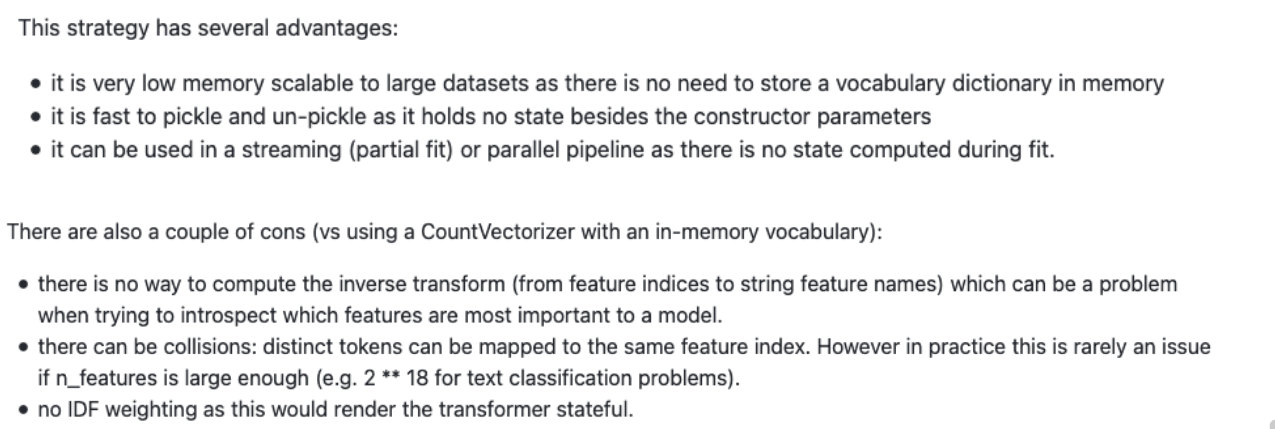

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

# transform
vectorizer = HashingVectorizer(n_features=10)
# recommended reading : https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/
# https://datascience.stackexchange.com/questions/22250/what-is-the-difference-between-a-hashing-vectorizer-and-a-tfidf-vectorizer


# create the hashing vector, direct transform
vector = vectorizer.transform(text)

# summarize the vector
print(vector.shape)
print(vector.toarray())

(1, 10)
[[ 0.          0.57735027  0.          0.          0.          0.
   0.         -0.57735027 -0.57735027  0.        ]]


In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = HashingVectorizer(n_features=2**4)
X = vectorizer.fit_transform(corpus)
print(X.shape)

(4, 16)


In [ ]:
# summarize the vector
print(X.shape)
print(X.toarray())

(4, 16)
[[-0.57735027  0.          0.          0.          0.          0.
   0.          0.         -0.57735027  0.          0.          0.
   0.          0.57735027  0.          0.        ]
 [-0.81649658  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.40824829
   0.          0.40824829  0.          0.        ]
 [ 0.          0.          0.          0.         -0.70710678  0.70710678
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.57735027  0.          0.          0.          0.          0.
   0.          0.         -0.57735027  0.          0.          0.
   0.          0.57735027  0.          0.        ]]


It created vector of size 10 and now this can be used for any
supervised/unsupervised tasks.

https://medium.com/value-stream-design/introducing-one-of-the-best-hacks-in-machine-learning-the-hashing-trick-bf6a9c8af18f

Converting Text to Features Using TF-IDF
--
Again, in the above-mentioned text-to-feature methods, there are few drawbacks, hence the introduction of TF-IDF.

Below are the disadvantages of the above methods.

• Let’s say a particular word is appearing in all the documents of the corpus, then it will achieve higher importance in our previous methods. That’s bad for our analysis.

• The whole idea of having TF-IDF is to reflect on how important a word is to a document in a collection, and hence normalizing words appeared frequently in all the documents.

Problem
--
Text to feature using TF-IDF.

Solution
--
Term frequency (TF): Term frequency is simply the ratio of the count of a
word present in a sentence, to the length of the sentence.

TF is basically capturing the importance of the word irrespective of the
length of the document. For example, a word with the frequency of 3 with
the length of sentence being 10 is not the same as when the word length of
sentence is 100 words. It should get more importance in the first scenario;
that is what TF does.

Inverse Document Frequency (IDF): IDF of each word is the log of the ratio of the total number of rows to the number of rows in a particular document in which that word is present.

IDF = log(N/n), where N is the total number of rows and n is the
number of rows in which the word was present.

IDF will measure the rareness of a term. Words like “a,” and “the” show
up in all the documents of the corpus, but rare words will not be there
in all the documents. So, if a word is appearing in almost all documents,
then that word is of no use to us since it is not helping to classify or in
information retrieval. IDF will nullify this problem.

TF-IDF is the simple product of TF and IDF so that both of the drawbacks are addressed, which makes predictions and information retrieval relevant.

In [ ]:
Text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]

#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Create the transform
vectorizer = TfidfVectorizer()

#Tokenize and build vocab
vectorizer.fit(Text)

#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]


In [ ]:
vectorizer.transform(Text).toarray()

array([[0.36388646, 0.27674503, 0.27674503, 0.36388646, 0.36388646,
        0.36388646, 0.36388646, 0.42983441],
       [0.        , 0.78980693, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.61335554],
       [0.        , 0.        , 0.78980693, 0.        , 0.        ,
        0.        , 0.        , 0.61335554]])

In [ ]:
Text = ["The quick brown fox jumped over the lazy dog",
        "The  brown fox jumped over the window",
        "The brown lion kicked the fox"]

#Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Create the transform
vectorizer = TfidfVectorizer()

#Tokenize and build vocab
vectorizer.fit(Text)

#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 9, 'quick': 8, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 7, 'lazy': 5, 'dog': 1, 'window': 10, 'lion': 6, 'kicked': 4}
[1.         1.69314718 1.         1.28768207 1.69314718 1.69314718
 1.69314718 1.28768207 1.69314718 1.         1.69314718]


If you observe, “the” is appearing in all the 3 documents and it does
not add much value, and hence the vector value is 1, which is less than all
the other vector representations of the tokens.

All these methods or techniques we have looked into so far are based
on frequency and hence called frequency-based embeddings or features.
And in the next section, let us look at prediction-based embeddings,
typically called word embeddings.